In [13]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import curve, vec, color, rate, canvas, sphere, scene
import scipy

Text(0.5, 1.0, 'Probability Density after Time Evolution')

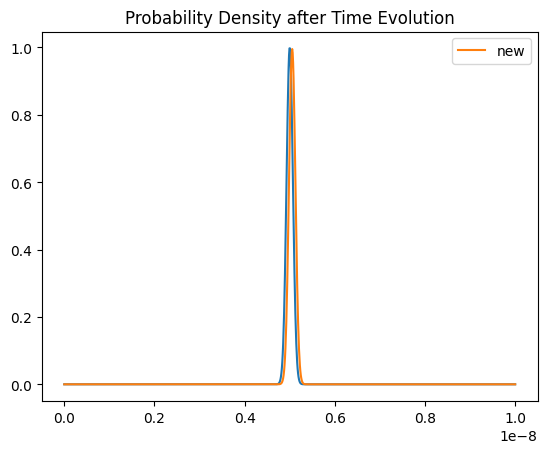

In [75]:
N = 1000
L = 1e-8
x = np.linspace(0, L, N)
m = 9.109e-31
def crank_nicolson_step(psi, V, dx, dt):
    N = len(psi)
    b = B @ psi
    # Construct banded form for A: (3, N) array
    psi_new = scipy.linalg.solve_banded((1, 1), ab, b)
    return psi_new

x0 = L / 2
sigma = 1e-10
psi = np.exp(-((x - x0)**2) / (2 * (sigma)**2)) * np.exp(1j * 5e10 * x)

plt.plot(x, np.abs(psi)**2)
plt.title('Initial Probability Density')

A = np.zeros((N, N), dtype=complex)
B = np.zeros((N, N), dtype=complex)


V = np.zeros(N)
dx = x[1] - x[0]
dt = 1e-18
h = 1.05e-34
r = 1j * dt * h / (2 * dx**2 * m)
for i in range(1, N-1):
    A[i, i-1] = -r / 2
    A[i, i] = 1 + r
    A[i, i+1] = -r/2
    
    B[i, i-1] = r / 2
    B[i, i] = 1 - r
    B[i, i+1] = r / 2

A[0, 0] = A[N-1, N-1] = 1 + r
B[0, 0] = B[N-1, N-1] = 1 - r
ab = np.zeros((3, N), dtype=complex)
ab[0, 1:] = [A[i-1, i] for i in range(1, N)]  # upper diag
ab[1, :]  = [A[i, i] for i in range(N)]       # main diag
ab[2, :-1] = [A[i+1, i] for i in range(N-1)]  # lower diag
num_steps = 10
for _ in range(num_steps):
    psi = crank_nicolson_step(psi, V, dx, dt)

plt.plot(x, np.abs(psi)**2, label="new")
plt.legend()
plt.title('Probability Density after Time Evolution')

0.0


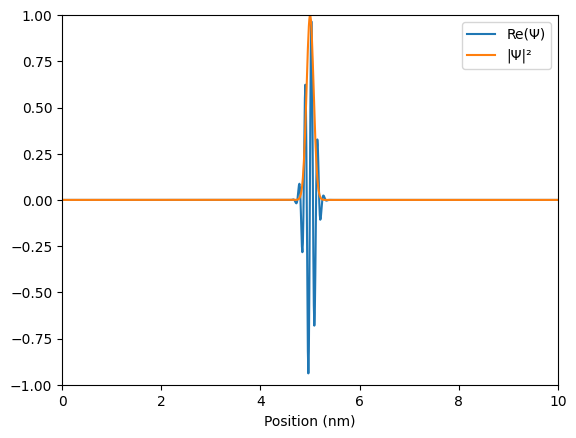

In [103]:
import matplotlib.animation as animation
psi = np.exp(-((x - x0)**2) / (2 * (sigma)**2)) * np.exp(1j * 5e10 * x)
# scene = canvas(title='Bouncing Ball Animation')
global ani
print(psi[0].real)
# psi_frame = curve(pos=[vec(x[i], psi[i].real, 0) for i in range(len(psi))], color=color.cyan, radius=0.0001)
global psi_frame
psi_frames = [psi]
fig = plt.figure()
ax = fig.add_subplot(111)
liner, = ax.plot([], [], label = 'Re(Ψ)')  # no label; time will be shown in a separate textbox
linei, = ax.plot([], [], label = '|Ψ|²')
# timer_text = ax.text(0.98, 0.95, 'Time: 0 attoseconds', transform=ax.transAxes,
#                      ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', pad=4))
# lines, = ax.plot([],[])
leg = plt.legend()
ax.set_xlabel('Position (nm)')
ax.set_xlim(0, L * 1e9)
def init():
    liner.set_data(x * 1e9, psi.real)
    # liner.set_linewidth(0.5)
    linei.set_data(x * 1e9, np.square(np.abs(psi)))
    # linei.set_linewidth(0.5)
    return liner,
def my_animate(i):
    step = psi_frames[-1]
    for _ in range(2):
        step = crank_nicolson_step(step, V, dx, dt)

    psi_frames.append(step)
    y = psi_frames[-1].real
    new_label = f'Time: {i * 6} attoseconds'  # Example: update label with current frame number
    # leg.get_texts()[0].
    # timer_text.set_text(new_label)
    liner.set_ydata(y)
    linei.set_ydata(np.square(np.abs(psi_frames[-1])))
    ax.set_title("Time Evolution of gaussian electron in a box, " + new_label)
    return linei, liner

ani = animation.FuncAnimation(fig=fig, func=my_animate, init_func=init, frames=5000, interval=1, blit=True, repeat=True)
ax.set_ylim(-1, 1)
plt.show()
ani.save('wave_packet_evolution3.mp4', fps=60)
